In [161]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import PyPDF2
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
import re

In [162]:
class Cloud:
    
    def __init__(self,inputPath,outputPath,numWords):
        self.__inputPath = inputPath
        self.__outputPath = outputPath
        self.__rawText = ""
        self.__additional = ["title","subtitle","certain"]
        self.__file = self.__readFile()
        self.__StopWords = list(set(list(set(STOPWORDS)) + stopwords.words('english'))) + self.__additional
        self.__numWords = numWords
        
    def __readFile(self):
        obj = open(self.__inputPath,'rb')
        pdfReader = PyPDF2.PdfFileReader(obj)
        numPage = pdfReader.numPages
        for i in range(0,10):
            pageObject = pdfReader.getPage(i)
            self.__rawText = self.__rawText + " " + pageObject.extractText()
        print('Raw Text Collection done.')
        
    def __process(self):
        print("Processing the Raw text Collected.")
        tokens = word_tokenize(self.__rawText)
        tokens = [w.lower() for w in tokens]
        filterTokens = [w for w in tokens if w not in self.__StopWords]
        punctTokens = [re.sub(r'[^\w\s]', '', w) for w in filterTokens if re.sub(r'[^\w\s]', '', w) != '']
        punctString = ''
        for i in range(0,self.__numWords):
            punctString += punctTokens[i] + ' '
        print('Processing of text is done.')
        return(punctString)
        
    def generateCloud(self):
        tokens = self.__process()
        cloud = WordCloud(width = 2400, height = 1600, background_color ='white', stopwords = [], min_font_size = 10).generate(tokens)
        print('Word Cloud is Created. Storing it ...')
        plt.figure(figsize = (24, 16), facecolor = None) 
        plt.imshow(cloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.savefig(self.__outputPath)
        plt.show() 

Raw Text Collection done.
Processing the Raw text Collected.
Processing of text is done.
Word Cloud is Created. Storing it ...


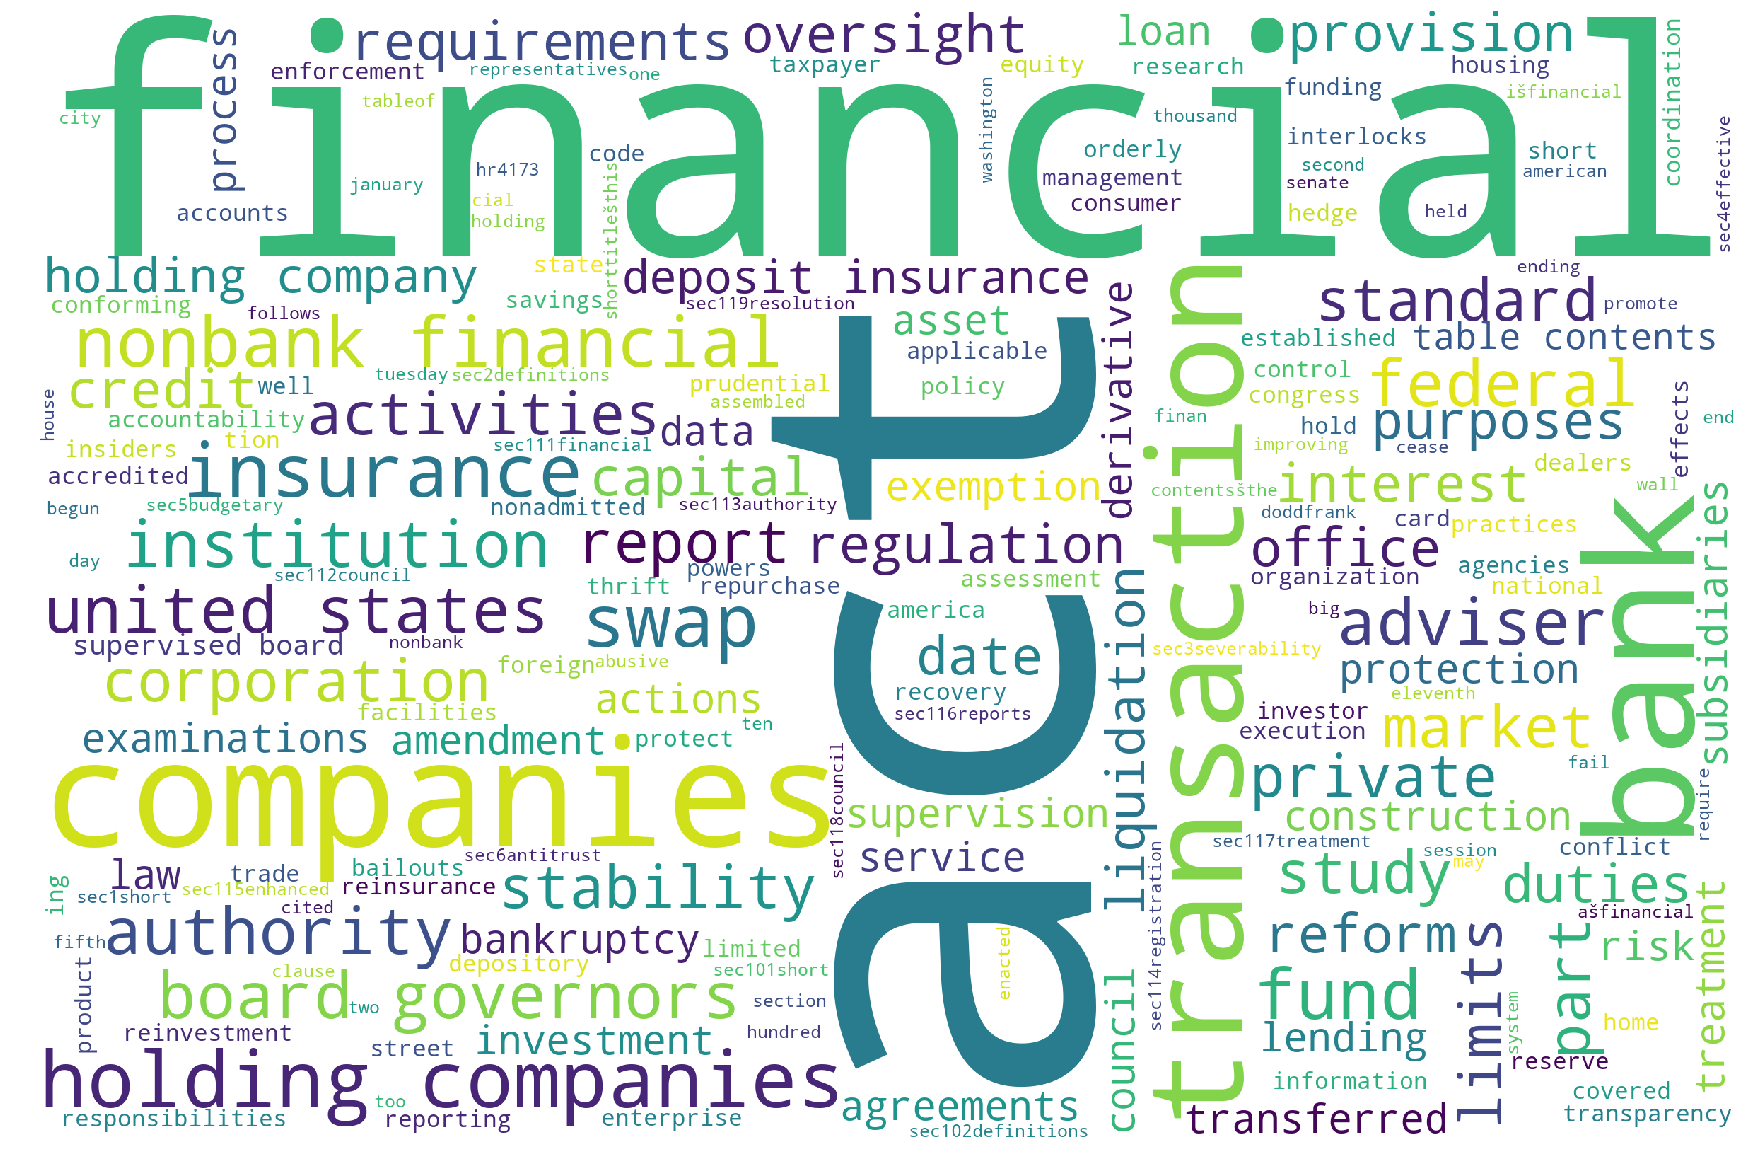

In [163]:
inputP = "C:\\Users\\Ratan Singh\\Desktop\\Machine Learning CS7545\\hr4173_enrolledbill.pdf"
outputP = "C:\\Users\\Ratan Singh\\Desktop\\Machine Learning CS7545\\wordcloud.png"

OP = Cloud(inputP,outputP,1000)
OP.generateCloud()